In [1]:
import sklearn
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [2]:
Boston = load_boston()

In [3]:
X = Boston.data
y = Boston.target

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [5]:
dat = {
    'N': X_train.shape[0],
    'M': X_train.shape[1],
    'X': X_train,
    'y': y_train
}

In [8]:
model = """
data {
    int<lower=0> N;
    int<lower=0> M;
    matrix[N, M] X;
    vector[N] y;
}

parameters {
    real beta_0;
    vector[M] beta;
    real<lower=0> sigma;
}

model {
    for (i in 1:N)
        y[i] ~ normal(beta_0 + dot_product(X[i], beta), sigma);
}
"""

In [9]:
import pystan

stm = pystan.StanModel(model_code=model)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_f5b0c1a8dac532970e2a3a8e821a1ba9 NOW.


In [10]:
n_itr = 5000
n_warmup = 1000
chains = 2

In [12]:
fit = stm.sampling(
    data=dat,
    iter=n_itr, 
    chains=chains,
    n_jobs=1,
    warmup=n_warmup,
    algorithm='NUTS',
    verbose=True
)

In [13]:
fit

Inference for Stan model: anon_model_f5b0c1a8dac532970e2a3a8e821a1ba9.
2 chains, each with iter=5000; warmup=1000; thin=1; 
post-warmup draws per chain=4000, total post-warmup draws=8000.

           mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
beta_0    33.85    0.09   5.81   22.5  29.88  33.89  37.88  45.04   3941    1.0
beta[1]    -0.1  5.7e-4   0.05   -0.2  -0.14   -0.1  -0.07-8.7e-3   7263    1.0
beta[2]    0.04  1.9e-4   0.02   0.01   0.03   0.04   0.05   0.07   7152    1.0
beta[3]    0.04  8.3e-4   0.07   -0.1-8.6e-3   0.04   0.08   0.18   7206    1.0
beta[4]    3.21    0.01   1.03   1.24    2.5   3.19   3.91   5.22  10406    1.0
beta[5]  -16.94    0.06   4.31 -25.36 -19.89 -16.94 -14.01   -8.5   5540    1.0
beta[6]    4.02  6.7e-3   0.48   3.08   3.69   4.02   4.36   4.96   5129    1.0
beta[7] -5.6e-4  1.8e-4   0.02  -0.03  -0.01-6.8e-4 9.6e-3   0.03   6829    1.0
beta[8]   -1.31  2.8e-3   0.22  -1.76  -1.46  -1.31  -1.16  -0.88   6308    1.0
beta[9]    

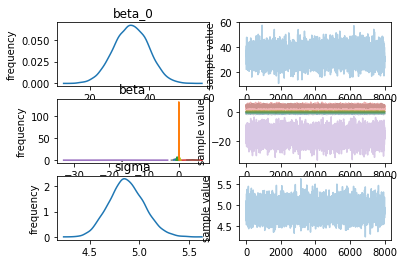

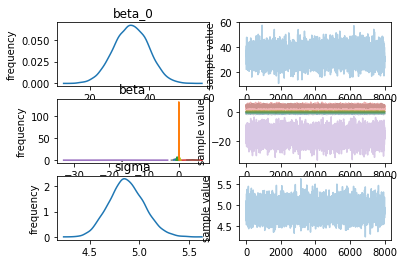

In [15]:
%matplotlib inline
fit.plot()